# Stock Prices Prediction Using Keras Long Short Term Memory

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
bnf = pd.read_csv('BANKNIFTY.csv')
nifty = pd.read_csv('NIFTY.csv')
eth = pd.read_csv('ETH-USD.csv')

In [3]:
bnf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-02,16703.949219,16714.500000,16218.650391,16252.700195,16252.700195,0.0
1,2015-09-03,16404.949219,16607.400391,16320.549805,16555.400391,16555.400391,0.0
2,2015-09-04,16444.199219,16444.199219,15933.150391,16129.099609,16129.099609,85700.0
3,2015-09-07,16222.200195,16273.349609,15762.200195,15790.099609,15790.099609,0.0
4,2015-09-08,15888.500000,16419.000000,15819.549805,16350.950195,16350.950195,0.0


In [4]:
nifty.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-02,7856.649902,7862.549805,7699.250000,7717.000000,7717.000000,215300.0
1,2015-09-03,7774.450195,7845.600098,7754.049805,7823.000000,7823.000000,155800.0
2,2015-09-04,7803.399902,7804.899902,7626.850098,7655.049805,7655.049805,193600.0
3,2015-09-07,7685.850098,7705.049805,7545.899902,7558.799805,7558.799805,141400.0
4,2015-09-08,7587.700195,7720.899902,7539.500000,7688.250000,7688.250000,172200.0


In [5]:
eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-02,1.35157,1.35491,1.26462,1.29479,1.29479,883769.0
1,2015-09-03,1.29519,1.30999,1.21103,1.26493,1.26493,702991.0
2,2015-09-04,1.26493,1.30252,1.23681,1.27441,1.27441,474391.0
3,2015-09-05,1.28056,1.34230,1.27119,1.33881,1.33881,448453.0
4,2015-09-06,1.33801,1.37364,1.29425,1.29583,1.29583,491968.0


In [9]:
def plot_data(self, df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

def plot_selected(self, df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # TODO: Your code here
    data = df.loc[start_index:end_index, columns]
    plot_data(data)

In [9]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [10]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [11]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [14]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Train on 1975 samples
Epoch 1/100
1975/1975 [==============================] - 11s 6ms/sample - loss: 0.0101
Epoch 2/100
1975/1975 [==============================] - 5s 3ms/sample - loss: 0.0030
Epoch 3/100
1975/1975 [==============================] - 5s 3ms/sample - loss: 0.0025
Epoch 4/100
1975/1975 [==============================] - 5s 3ms/sample - loss: 0.0024
Epoch 5/100
1975/1975 [==============================] - 5s 3ms/sample - loss: 0.0026
Epoch 6/100
1975/1975 [==============================] - 5s 3ms/sample - loss: 0.0022
Epoch 7/100
1975/1975 [==============================] - 5s 3ms/sample - loss: 0.0022
Epoch 8/100
1975/1975 [==============================] - 5s 3ms/sample - loss: 0.0021
Epoch 9/100
1975/1975 [==============================] - 5s 3ms/sample - loss: 0.0020
Epoch 10/100
1975/1975 [==============================] - 5s 3ms/sample - loss: 0.0020
Epoch 11/100
1975/1975 [==============================] - 5s 3ms/sample - loss: 0.0021
Epoch 12/100
1975/1975 [=====

In [15]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [16]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


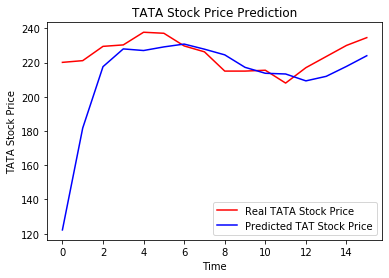

In [17]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()